This project is about analysing the data of super market based on data collected for 3 months i.e., Jan-19 to March-19.

 Below Questions are solved using data visualization.

Dataset description:
Instances: 1000
Features: 17 columns
Numerical : 8 columns

Categorical: 7 columns

Date-Time: 2 columns

 

Attribute Information:
Invoice id: Computer generated sales slip invoice identification number
Branch: Branch of supercenter (3 branches are available identified by A, B and C).
City: Location of supercenters
Customer type: Type of customers, recorded by Members for customers using member card and Normal for without member card.
Gender: Gender type of customer
Product line: General item categorization groups - Electronic accessories, Fashion accessories, Food and beverages, Health and beauty, Home and lifestyle, Sports and travel
Unit price: Price of each product in $
Quantity: Number of products purchased by customer
Tax: 5% tax fee for customer buying
Total: Total price including tax
Date: Date of purchase (Record available from January 2019 to March 2019)
Time: Purchase time (10am to 9pm)
Payment: Payment used by customer for purchase (3 methods are available – Cash, Credit card and Ewallet)
COGS: Cost of goods sold
Gross margin percentage: Gross margin percentage
Gross income: Gross income
Rating: Customer stratification rating on their overall shopping experience (On a scale of 1 to 10)
 
Assignment questions
Part-1: 

1. Is your supermarket more popular with males or females? 
2. What does the customer rating look like and can you also comment on its distribution? 
3. What can you say about the aggregate sales across the branches? 
4. Which is the most popular payment method used by customers?
Part-2: 

1. Does gross income affect customer ratings? 
2. Which is the most profitable branch? 
3. Create a boxplot between Gender and Gross income and explain the results? 
4. Can you see any time trend in gross income? 
5. What is the spending pattern of both males and females, meaning in which category do they spend more? 
6. How many products are bought by customers? 
7. Which day of the week has maximum sales? 
8. Which hour of the day is busiest? 
9. Which product line should your supermarket focus on? 
10. Which city should be chosen for expansion and what products should be focussed on?


We need to work on libraries like pandas, numpy, matplotlib, seaborn and datetime. Hence we need to import the libraries as below.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

Inorder to have an idea of data available, we need to import the data and display it. so that we will get a clear idea of contents and can be used for further refernces.

The time and dates in data frames are imoported in string format. so we need to convert them using below code.

In [13]:
df= pd.read_csv('supermarket_sales1.csv')
df['Date']=pd.to_datetime(df['Date'])
df['Time']=pd.to_datetime(df['Time'])
df['Time_hrs']=df['Time'].dt.hour
df

,Invoice ID,Branch,city code,Customer type,Gender,Product code,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Time_hrs
0,750-67-8428,A,CT1,Member,Female,PD1,74.69,7,26.1415,548.9715,2019-05-01,2022-04-26 13:08:00,Ewallet,522.83,4.761905,26.1415,9.1,13
1,226-31-3081,C,CT3,Normal,Female,PD2,15.28,5,3.8200,80.2200,2019-08-03,2022-04-26 10:29:00,Cash,76.40,4.761905,3.8200,9.6,10
2,631-41-3108,A,CT1,Normal,Male,PD3,46.33,7,16.2155,340.5255,2019-03-03,2022-04-26 13:23:00,Credit card,324.31,4.761905,16.2155,7.4,13
3,123-19-1176,A,CT1,Member,Male,PD1,58.22,8,23.2880,489.0480,2019-01-27,2022-04-26 20:33:00,Ewallet,465.76,4.761905,23.2880,8.4,20
4,373-73-7910,A,CT1,Normal,Male,PD4,86.31,7,30.2085,634.3785,2019-08-02,2022-04-26 10:37:00,Ewallet,604.17,4.761905,30.2085,5.3,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,CT3,Normal,Male,PD1,40.35,1,2.0175,42.3675,2019-01-29,2022-04-26 13:46:00,Ewallet,40.35,4.761905,2.0175,6.2,13
996,303-96-2227,B,CT9,Normal,Female,PD3,97.38,10,48.6900,1022.4900,2019-02-03,2022-04-26 17:16:00,Ewallet,973.80,4.761905,48.6900,4.4,17
997,727-02-1313,A,CT1,Member,Male,PD5,31.84,1,1.5920,33.4320,2019-09-02,2022-04-26 13:22:00,Cash,31.84,4.761905,1.5920,7.7,13
998,347-56-2442,A,CT1,Normal,Male,PD3,65.82,1,3.2910,69.1110,2019-02-22,2022-04-26 15:33:00,Cash,65.82,4.761905,3.2910,4.1,15


### **Part1:**

***Q1.Is your supermarket more popular with males or females? ***

Here we need to count the total count of males and females in the given data frame. This can be done using below code.

In [ ]:
df1=df.Gender.value_counts()
df1



Female    501
Male      499
Name: Gender, dtype: int64

The count of Male and Female customers are almost equal. so we can conclude that the supermarket is equally popular based on gender. We can have graphical represntation of same in below bar plot.

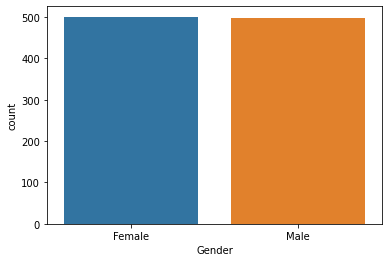

In [3]:

sns.countplot(x='Gender',data=df)

**#2. What does the customer rating look like and can you also comment on its distribution?**

Here we can group the 3 branches, A,B,C and get the average customer ratings on each branch as per below.
we can see that branches A and C are having good customer ratings of 7.

Branch
A    7.02
B    6.80
C    7.08
Name: Rating, dtype: float64


<BarContainer object of 3 artists>

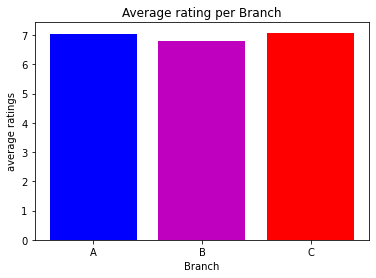

In [12]:

avg_rating=round(df.groupby('Branch')['Rating'].mean(),2)
print(avg_rating)
x=list(avg_rating.index)
y=list(avg_rating.values)
plt.title('Average rating per Branch')
plt.xlabel('Branch')
plt.ylabel('average ratings')
plt.bar(x,y,color=['b','m','r'])

**Q3. Aggregate sales across the branches**

we can solve this question be simply grouping the branch against gross income. Also we can get the bar plot as below

<BarContainer object of 3 artists>

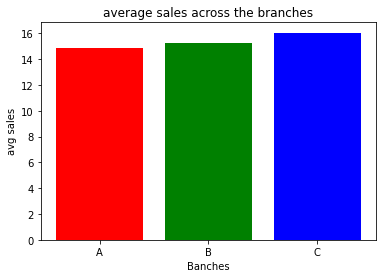

In [10]:

avg_sales=round(df.groupby('Branch')['gross income'].mean(),2)
avg_sales
x=list(avg_sales.index)
y=list(avg_sales.values)
plt.title('average sales across the branches')
plt.xlabel('Banches')
plt.ylabel('avg sales')
plt.bar(x,y,color=['r','g','b'])


**Q4. Which is the most popular payment method used by customers?**

we can easily count the column using value_counts() function as below and we can get the count plot.

from the below output, we can see that Ewallet and Cash are the more popular modes of payment.

Ewallet        345
Cash           344
Credit card    311
Name: Payment, dtype: int64


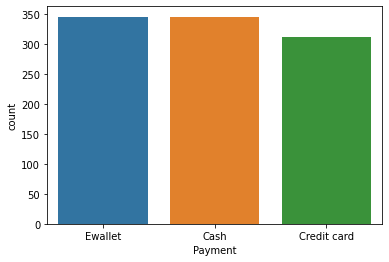

In [15]:
print(df['Payment'].value_counts())
sns.countplot(x='Payment',data=df)

# **Part 2**

**1. Does gross income affect customer ratings?**

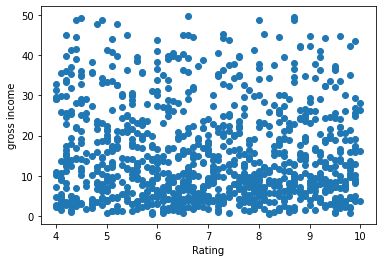

In [17]:

y=df['gross income']
x=df['Rating']
plt.xlabel('Rating')
plt.ylabel('gross income')
plt.scatter(x,y)

from the scatter plot, we can see that, ratings for less gross margins are more. ratings are equally distributed throughout the graph.


**2. Which is the most profitable branch?**

Here we are grouping by branches and getting the sum of gross profit in each group so that we can get the total profit made by each branch.
and we can plot the bar graph as below.
Branch A and B are most profitable branches

Branch
A    5057.1605
B    5057.0320
C    5265.1765
Name: gross income, dtype: float64


<BarContainer object of 3 artists>

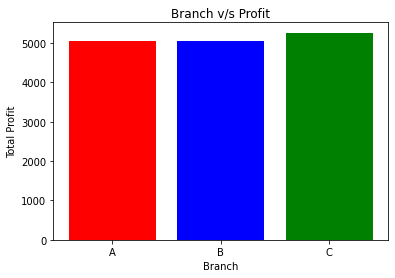

In [16]:

profit=df.groupby('Branch')['gross income'].sum()
print(profit)
x=list(profit.index)
y=list(profit.values)
plt.title('Branch v/s Profit')
plt.xlabel('Branch')
plt.ylabel('Total Profit')
plt.bar(x,y,color=['r','b','g'])

part2. 3. Create a boxplot between Gender and Gross income and explain the results?

Below we have done box plot of gross income vs gender using seaborn library. we can see that both meadian vaues of male and female customers are almost same.

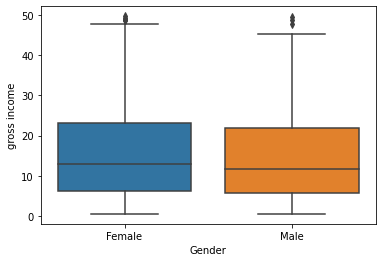

In [5]:
sns.boxplot(x='Gender',y='gross income', data=df)

**4.Can you see any time trend in gross income?**

from the below line graph of gross income vs time, we can see that gross income moves in sinusoidal pattern

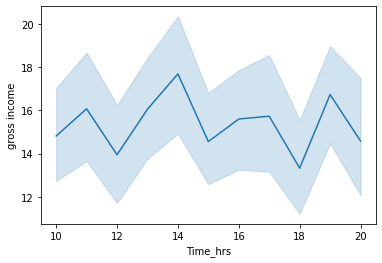

In [23]:

sns.lineplot(x='Time_hrs',y='gross income',data=df)

***5. What is the spending pattern of both males and females, meaning in which category do they spend more? ***

we have plotted 2 bar graphs below.
1. total expenditure of male on diffrent products
2. total expenditure of female on diffrent products.

we can see that male customers have spent more on product PD1. And female customers have spent more on product PD5.

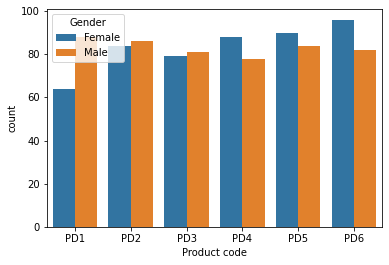

In [22]:
sns.countplot(x='Product code',hue='Gender', data=df)

<BarContainer object of 6 artists>

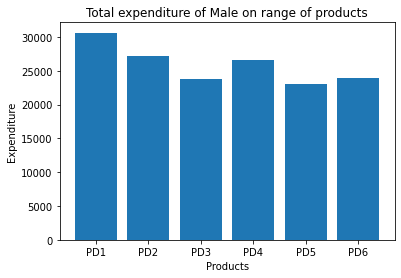

In [ ]:
df1=df.loc[:,('Gender','Product code','Total')]
df_male=df1[df1['Gender']=='Male']
spend_male=df_male.groupby('Product code')['Total'].sum()
x=list(spend_male.index)
y=list(spend_male.values)
plt.title('Total expenditure of Male on range of products')
plt.xlabel('Products')
plt.ylabel('Expenditure')
plt.bar(x,y)

<BarContainer object of 6 artists>

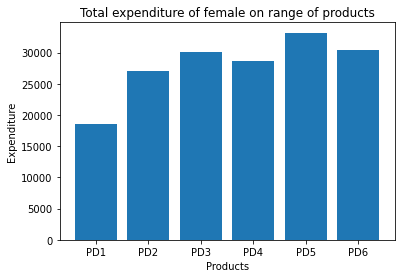

In [ ]:
df2=df.loc[:,('Gender','Product code','Total')]
df_female=df2[df2['Gender']=='Female']
spend_female=df_female.groupby('Product code')['Total'].sum()
x=list(spend_female.index)
y=list(spend_female.values)
plt.title('Total expenditure of female on range of products')
plt.xlabel('Products')
plt.ylabel('Expenditure')
plt.bar(x,y)

***6. How many products are bought by customers? ***

In [ ]:

print('Total products bought by customers are' , df['Quantity'].sum())

Total products bought by customers are 5510


Total products bought by customers are 5510

**7. Which day of the week has maximum sales?**

From the below graph, we can clearly see that Tuesday has the maximum sales across 3 branches

<BarContainer object of 7 artists>

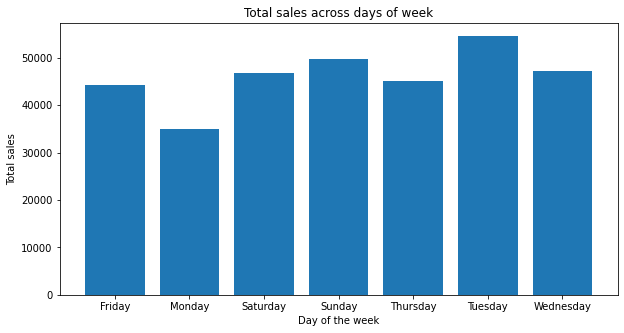

In [ ]:

df['Day']=df['Date'].dt.day_name()
df_week_sales=df.loc[:,('Day','Total')]
dfw=df_week_sales.groupby('Day')['Total'].sum()

x=list(dfw.index)
y=list(dfw.values)
plt.figure(figsize=(10,5))
plt.title('Total sales across days of week')
plt.xlabel('Day of the week')
plt.ylabel('Total sales')
plt.bar(x,y)




**8.Which hour of the day is busiest?**

below bar graph shows  time in hours in a day vs number of transactions happened in a given hour.
clearly, the 19:00 hour in the day is busiest.

<BarContainer object of 11 artists>

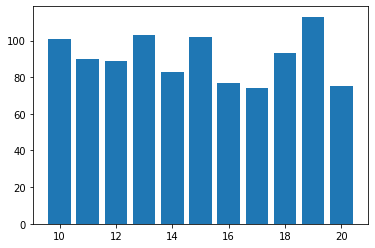

In [ ]:

df_time=df.groupby('Time_hrs')['Time_hrs'].count()
x=list(df_time.index)
y=list(df_time.values)
plt.bar(x,y)


**9. Which product line should your supermarket focus on?**


Refering to the below graph, we can infer that, Company should focus on PD1 since the total units sold are comparitively lesser.

<BarContainer object of 6 artists>

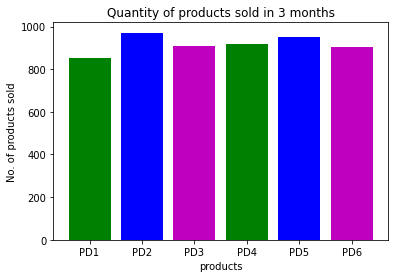

In [ ]:
df_focus=df.groupby('Product code')['Quantity'].sum()

x=(df_focus.index)
y=(df_focus.values)
plt.title('Quantity of products sold in 3 months')
plt.xlabel('products')
plt.ylabel('No. of products sold')
plt.bar(x,y, color=['g','b','m'])


**10. Which city should be chosen for expansion and what products should be focussed on?**

<BarContainer object of 3 artists>

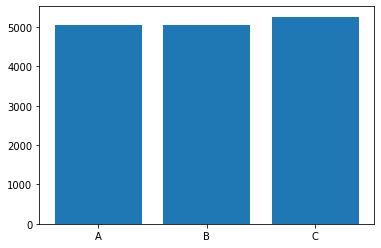

In [ ]:
df.loc[:,('Branch','Product code','gross income')]
city1=df.groupby('Branch')['gross income'].sum()
x=(city1.index)
y=(city1.values)
plt.bar(x,y)

From the above graph, we can see that Branch C which is located in city3 is making good profit. Hence, company can consider city3 as expansion city.

<BarContainer object of 6 artists>

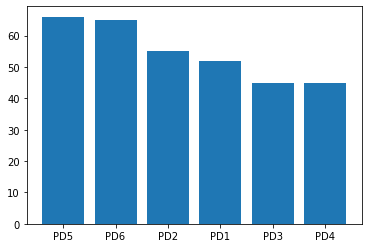

In [ ]:
df5=df[df['Branch']=='C']
product_c= df5['Product code'].value_counts()
x=(product_c.index)
y=(product_c.values)
plt.bar(x,y)

the above graph shows the count of products sold in brach C. 
Product PD5 is sold highest. So we can infer that, In City3, Product PD5 can be concentrated well since this product has highest potential to gain more profits.